Summary Statistics:
       Radiation_Longwave_(W/m²)  Radiation_Shortwave_(W/m²)  \
count               27374.000000                27374.000000   
mean                   42.995679                   97.026261   
std                    21.451927                   75.062880   
min                     0.611385                    2.819259   
25%                    26.157544                   31.037187   
50%                    40.777005                   78.443183   
75%                    57.113572                  149.332133   
max                   111.851400                  310.191700   

       Humidity_(kg/kg)  Wind_U_(m/s)  Wind_V_(m/s)           lat      lon  \
count      27374.000000  27374.000000  27374.000000  2.737400e+04  27374.0   
mean           0.006523      1.176320      1.503084  5.324608e+01     -2.5   
std            0.002126      3.066843      2.940138  1.659148e-11      0.0   
min            0.001855     -9.739025     -8.991429  5.324607e+01     -2.5   
25%          

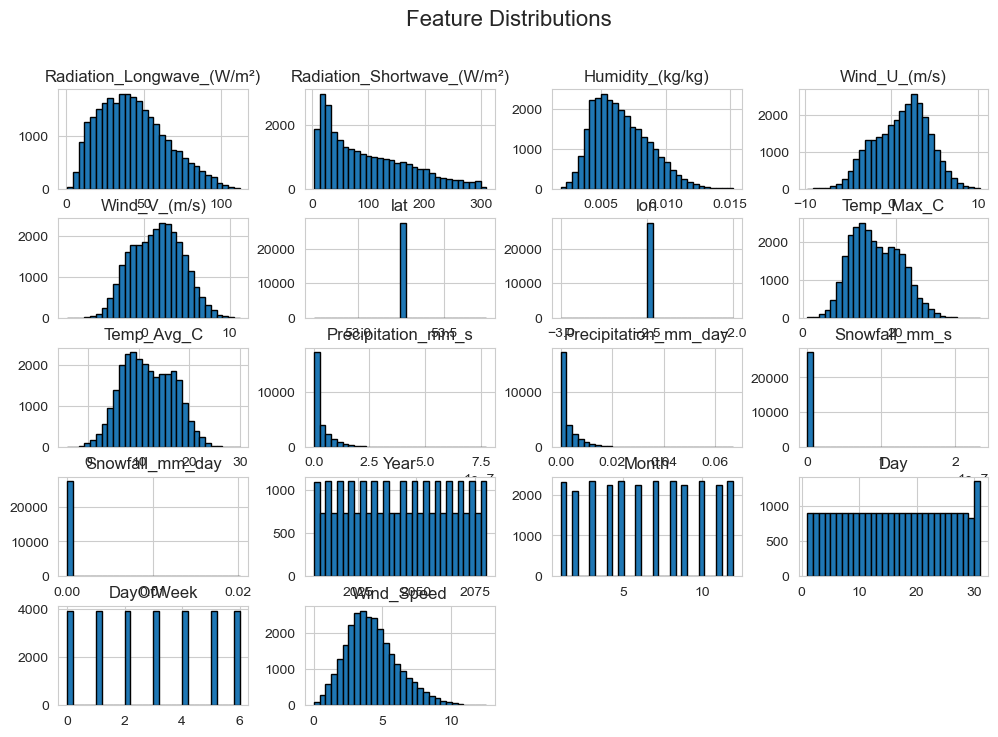

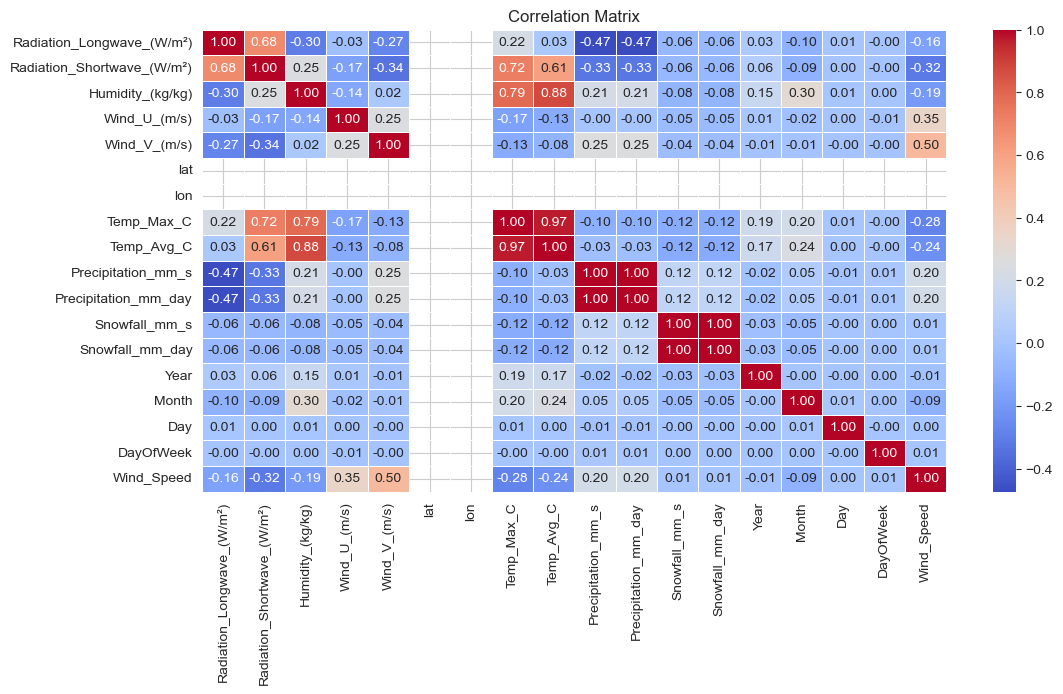

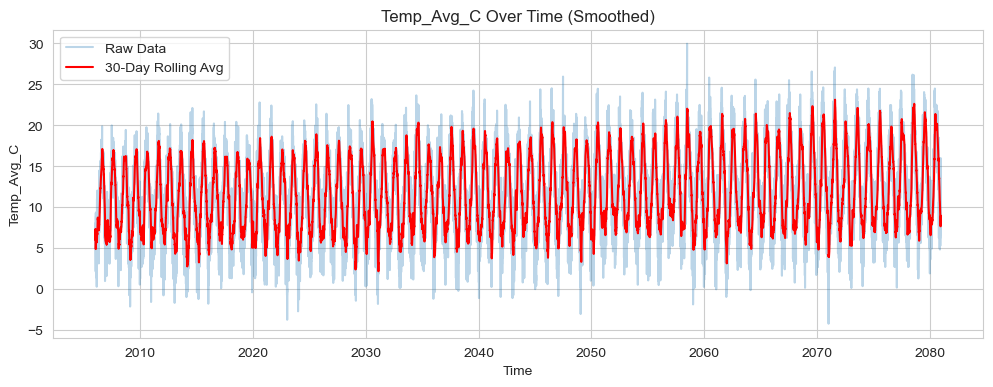

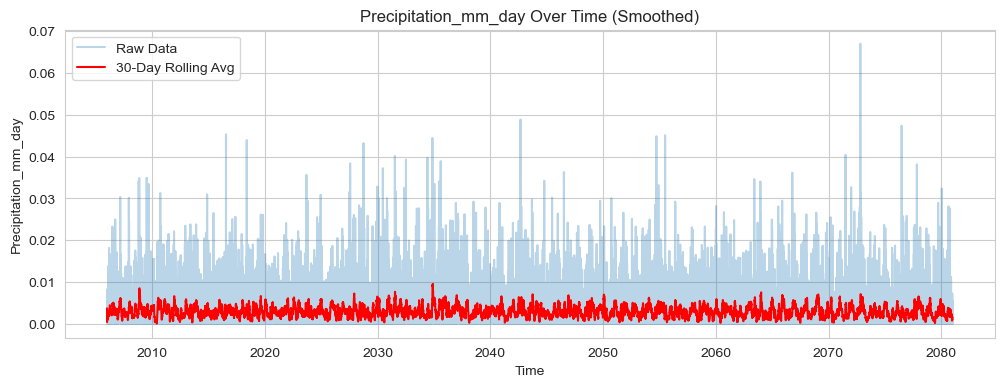

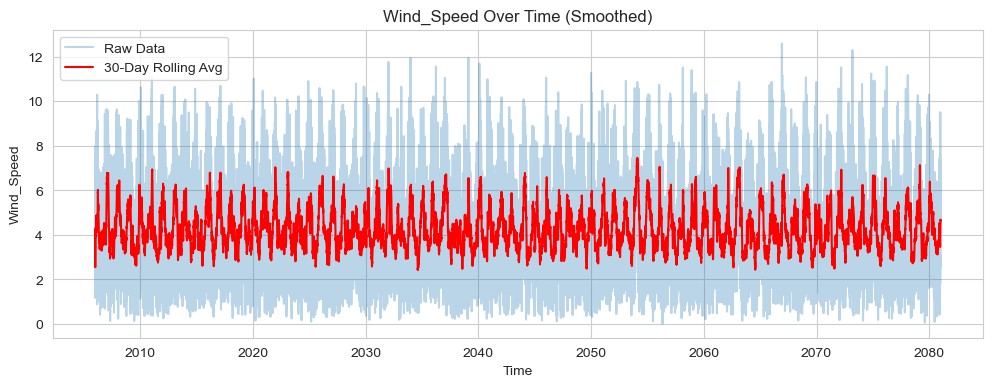

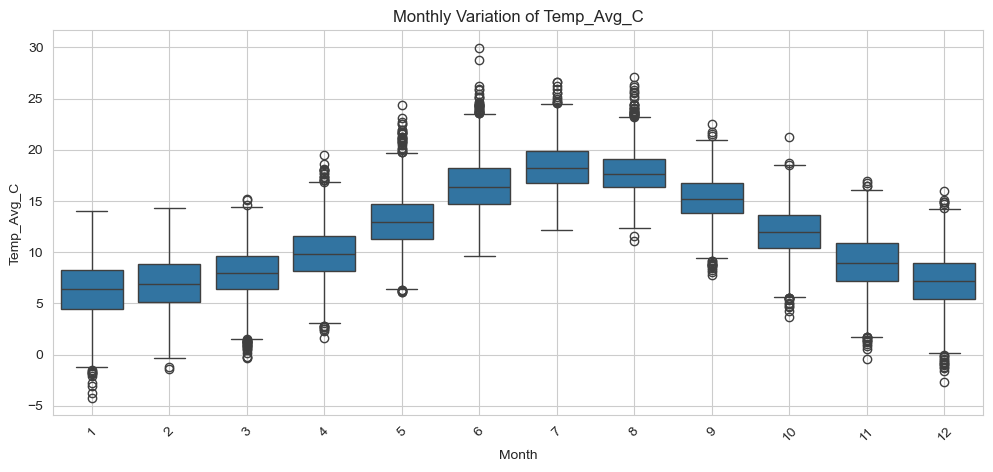

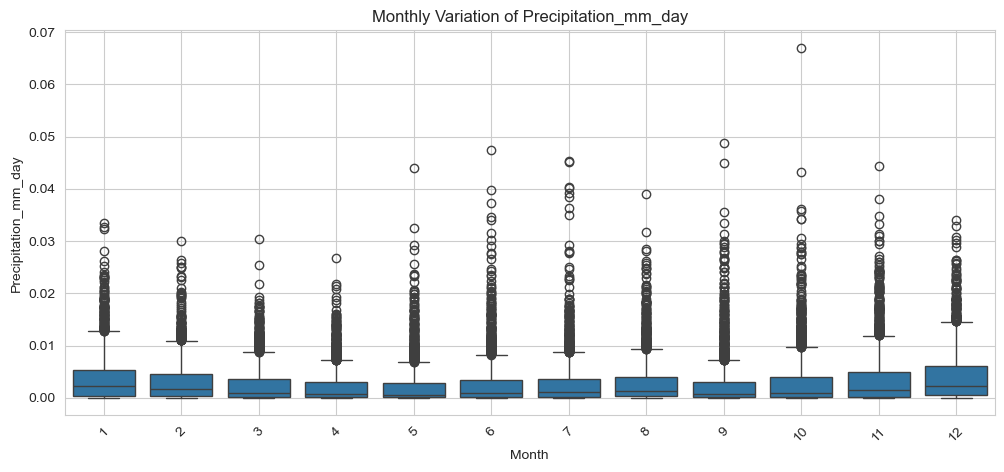

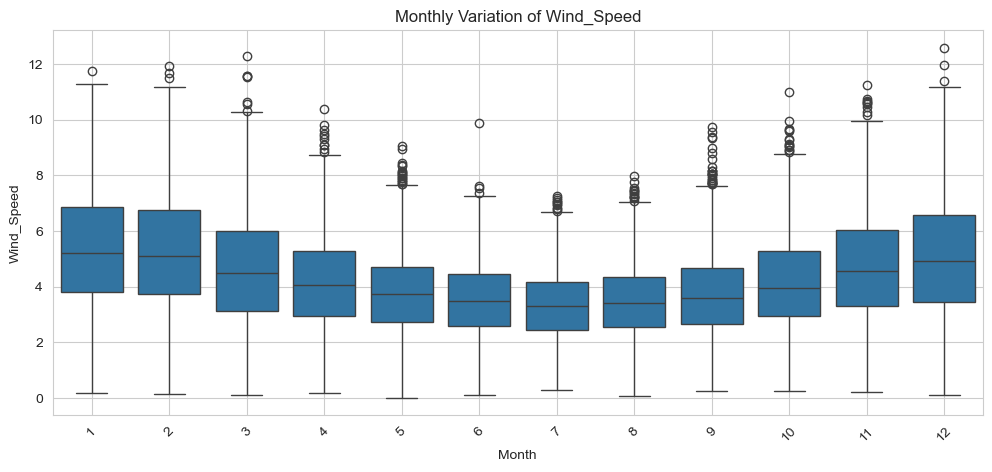

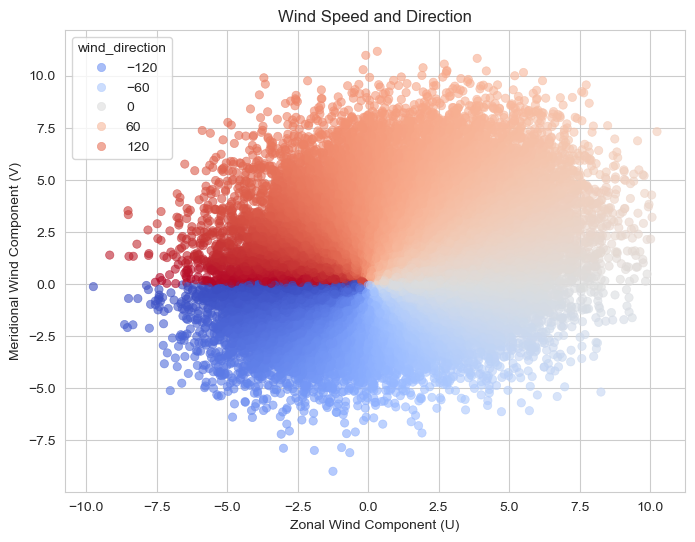

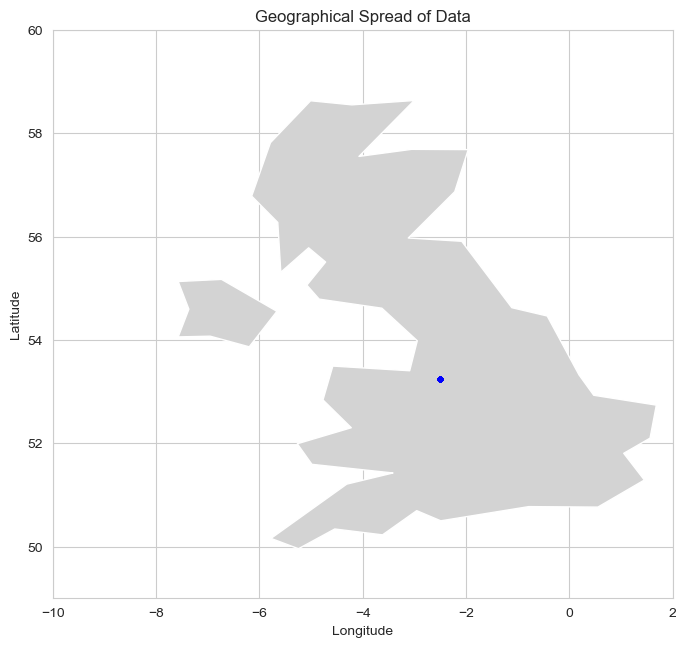

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

# Load the cleaned dataset
file_path = "project_1_cleaned(in).csv"
df = pd.read_csv(file_path)

# Convert time column to datetime
df['time'] = pd.to_datetime(df['time'])

# Convert Month_Name to numerical values and ensure correct data type
df['Month'] = df['Month_Name'].map({"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12}).astype('Int64')

# Drop categorical columns that may interfere with numerical analysis
df = df.drop(columns=['Month_Name', 'Day_Name'], errors='ignore')

# Ensure all columns used in correlation are numeric
numeric_df = df.select_dtypes(include=['number'])

# Summary Statistics
print("Summary Statistics:")
print(numeric_df.describe())

# Check for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# Feature Distributions
numeric_df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Time Series Trends with Smoothing
rolling_window = 30  # 30-day rolling average for smoothing
for var in ['Temp_Avg_C', 'Precipitation_mm_day', 'Wind_Speed']:
    plt.figure(figsize=(12, 4))
    plt.plot(df['time'], df[var], alpha=0.3, label='Raw Data')
    plt.plot(df['time'], df[var].rolling(window=rolling_window, min_periods=1).mean(), label=f'{rolling_window}-Day Rolling Avg', color='red')
    plt.xlabel("Time")
    plt.ylabel(var)
    plt.title(f"{var} Over Time (Smoothed)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Seasonal Trends
sns.set_style("whitegrid")
for var in ['Temp_Avg_C', 'Precipitation_mm_day', 'Wind_Speed']:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x='Month', y=var, data=df)
    plt.xlabel("Month")
    plt.ylabel(var)
    plt.title(f"Monthly Variation of {var}")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Wind Analysis (Speed & Direction)
df['wind_direction'] = np.arctan2(df['Wind_V_(m/s)'], df['Wind_U_(m/s)']) * (180 / np.pi)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Wind_U_(m/s)', y='Wind_V_(m/s)', hue=df['wind_direction'], palette='coolwarm', alpha=0.6, edgecolor=None, data=df)
plt.xlabel("Zonal Wind Component (U)")
plt.ylabel("Meridional Wind Component (V)")
plt.title("Wind Speed and Direction")
plt.grid(True)
plt.show()

# Geographical Spread on a UK Map with Adjusted Scale
uk = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
uk = uk[uk['SOVEREIGNT'] == 'United Kingdom']

df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['lon'], df['lat']))

fig, ax = plt.subplots(figsize=(8, 10))
uk.plot(ax=ax, color='lightgray')
df_geo.plot(ax=ax, markersize=10, alpha=0.6, color='blue')
plt.xlim(-10, 2)  # Adjust longitude range to zoom into the UK
plt.ylim(49, 60)  # Adjust latitude range to zoom into the UK
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Spread of Data")
plt.grid(True)
plt.show()
